<img src="assets/Nasdaq.webp" style="display:block; margin:auto" width=350>

<h1><center>Project: Exploring Financial Data using Nasdaq Data Link API</center></h1>

#### Goal
In this project, we explore financial data using the `Nasdaq Data Link API` to gain insights into the financial health of various companies. By analyzing key financial metrics, such as 'accrued expenses turnover', we aim to understand how different organizations manage their short-term liabilities and overall financial efficiency. 'Accrued expenses turnover' is crucial as it reflects a company’s ability to settle outstanding debts, indicating liquidity and operational efficiency. This project uses Python to programmatically extract, clean, and visualize the data to uncover trends across various companies and geographical regions. The insights drawn from this analysis have practical applications in corporate finance, business strategy, and regional economic performance.

#### Data 

Brief API description: The [Nasdaq Data Link API](https://docs.data.nasdaq.com/docs/in-depth-usage-1) provides a gateway to a wide range of financial data sets, including comprehensive metrics on various companies. We will focus on the MER/F1 datatable, which contains detailed financial information such as balance sheets, cash flow statements, and income statements. We will extract financial data for a specific set of companies, with an emphasis on understanding their financial performance over time. We'll be looking at metrics like 'accrued expenses turnover' and exploring how these values differ among companies and regions.

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

In [1]:
# Import relevant packages
import config
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

#### Endpoint and Parameters to Query the API

In [2]:
# Load api_key from config file
api_key = config.API_KEY

In [3]:
#Base URL Structure:
base_url = r'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

##### Optional Query Parameters:

- Limit rows per request: qopts.per_page=10.
- Filter by 'ticker' column value 'SPY': ticker=SPY.
- Specify columns in the response: qopts.columns=ticker,date,shares_outstanding.
- Filter rows by multiple 'ticker' values: ticker=SPY,IWM,GLD.

This particular table is filterable on columns date, ticker, shares_oustanding, nav and flow_daily. This means that users can narrow down their request to rows with specific values of date, ticker, shares_oustanding, nav and flow_daily. Filter columns: qopts.columns.

the API has a limit of 10,000 rows of data, this type of call will not actually download the entire table for most datasets. There are two options to overcome the 10,000 row return limit. 

In [4]:
# Set get parameters: api_key and qopts.per_page to 10 --> to fetch a small sample of the data
parameters = {'api_key' : api_key, 'qopts.per_page' : 10}

In [5]:
# Get request with url and parameters, transform to json format
response = requests.get(base_url, params=parameters).json()

In [6]:
# Check response data
print(response)

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

In this part of the fetched data, we see two sections of the datatable. The first is the data section, which contains the actual values for each row, and the second is the columns section, which provides metadata for each column. The metadata includes key-value pairs that describe each column, such as name: 'compnumber' and type: 'Integer'.

#### Processing the JSON Data into a DataFrame

The first row of the get request data shows that for Deutsche Bank AG, in Q2 2011, the 'Accrued Expenses Turnover Ratio' was approximately 10.48. This indicates that the bank turned over its accrued expenses about 10.48 times in that quarter, suggesting efficient management of short-term liabilities. A high turnover ratio, like this, generally points to effective liquidity management, assuming it is consistent with industry benchmarks and company performance norms.

Our objective is to analyze trends in 'accrued expenses turnover' across multiple companies and regions, exploring how different geographic areas contribute to these financial metrics. Extracting insights directly from JSON data is inefficient and cumbersome, so we will focus on transforming this JSON response into a structured `pandas DataFrame` for easier manipulation and analysis. This conversion will allow us to perform deeper statistical analysis and identify key patterns in the data.

In [7]:
# Set get parameters: api_key and qopts.per_page to 10000
parameters = {'api_key' : api_key, 'qopts.per_page' : 10000}

# Get request with url and parameters, transform to json format
response = requests.get(base_url, params=parameters).json()

In [8]:
# Extract the row values from our response data
row_values = response['datatable']['data']
print(row_values[:1])

[[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived']]


In [9]:
# Extract the columns from our response data
columns = response['datatable']['columns']

# Set list
column_names = []

# For loop to append column_names from key 'name'
for column in columns:
    column_names.append(column['name'])

print(column_names)

['compnumber', 'reportid', 'mapcode', 'amount', 'reportdate', 'reporttype', 'auditorstatus', 'currency', 'consolidated', 'longname', 'shortname', 'status', 'countrycode', 'region', 'cik', 'mic', 'ticker', 'exchange', 'address1', 'address2', 'address3', 'address4', 'city', 'statecode', 'country', 'zipcode', 'phonenumber', 'faxnumber', 'website', 'fye', 'indicator', 'statement']


In [10]:
# Use extracted data to create new pandas dataframe
df_metric = pd.DataFrame(row_values, columns=column_names)

# Check head of dataset
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


#### Understanding the Dataset

Now that we have our JSON data in a Pandas DataFrame, we can utilize various methods provided by pandas to work with our data more comfortably. For instance, we can run `df_metric.info()` to gain insights into the various columns of our dataset, or `df_metric.shape` to determine the number of rows and columns. Methods like `.groupby()`, `.apply()`, `.describe()` and others will be helpful as well. Our choice of method will always be guided by our goals and objectives.

Our two main goals are:

- Analyze the financial trend of 'accrued expenses turnover' over a period for various companies, particularly banks.
- Examine how different regions contribute to these financial metrics.

The following table contains an overview of potential columns for our analysis including a short explanation:

| Column Name    | Description                                                |
|----------------|------------------------------------------------------------|
| `compnumber`   | Unique identifier for each company                         |
| `reportid`     | ID associated with a specific financial report             |
| `mapcode`      | Code representing a specific financial metric or data point|
| `amount`       | Numerical value of the financial metric                    |
| `reportdate`   | Date of the financial report                               |
| `reporttype`   | Type of the report (e.g., Q1, Q2)                          |
| `currency`     | Currency in which financial amounts are reported           |
| `longname`     | The name of the bank or company                            |
| `city`         | The city to which a given bankor company belong            |
| `country`      | region to which a given bank or company is situated        |
| `indicator`    | Specific financial indicator being reported                |
| `statement`    | Type of financial statement from which the data is derived |

In [11]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

Looking at the specific columns and keeping in mind our two goals, we'll choose the following columns to include in our analysis:

- `amount`: This column likely holds the actual value for 'accrued expenses turnover,' so it's crucial for analyzing financial trends.
- `indicator`:  This column holds the name of the related metric
- `reportdate`: This will allow us to track the financial metric over time (for trend analysis).
- `longname`: These columns will help us to identify the companies (especially banks) we're analyzing.
- `country`: To examine how different countries contribute to the financial metric.

In [12]:
interesting_columns = ['amount', 'indicator', 'reportdate', 'longname', 'country']

#### Filtering the DataFrame for Analysis

'Accrued expenses turnover' is a key financial efficiency ratio. It measures how often a company pays off its accrued expenses within a certain period, providing insights into:

- 'Cash Flow Management': It indicates how well a company is managing its cash flow in relation to its short-term obligations. A higher ratio suggests efficient management and a strong liquidity position.
- 'Operational Efficiency': This metric can reflect a company's operational efficiency, showing how promptly it settles its short-term debts.
- 'Financial Health Indicator': Regular payment of accrued expenses signifies good financial health and creditworthiness, which is essential for maintaining good supplier relationships and business stability.

In [13]:
# Create new df based on interesting_columns
df_metric = df_metric[interesting_columns]

# Check values of new dataframe
df_metric.head()

,amount,indicator,reportdate,longname,country
0,10.481948,Accrued Expenses Turnover,2011-06-30,Deutsche Bank AG,DEU
1,8.161754,Accrued Expenses Turnover,2011-09-30,Deutsche Bank AG,DEU
2,10.788213,Accrued Expenses Turnover,2012-06-30,Deutsche Bank AG,DEU
3,9.437545,Accrued Expenses Turnover,2012-09-30,Deutsche Bank AG,DEU
4,8.755041,Accrued Expenses Turnover,2013-06-30,Deutsche Bank AG,DEU


In [14]:
# Filter dataframe for inidicator
filtered_df = df_metric[df_metric['indicator'] == 'Accrued Expenses Turnover']

# Check values of new dataframe
filtered_df.head()

,amount,indicator,reportdate,longname,country
0,10.481948,Accrued Expenses Turnover,2011-06-30,Deutsche Bank AG,DEU
1,8.161754,Accrued Expenses Turnover,2011-09-30,Deutsche Bank AG,DEU
2,10.788213,Accrued Expenses Turnover,2012-06-30,Deutsche Bank AG,DEU
3,9.437545,Accrued Expenses Turnover,2012-09-30,Deutsche Bank AG,DEU
4,8.755041,Accrued Expenses Turnover,2013-06-30,Deutsche Bank AG,DEU


In [15]:
# Count values of indicator column
filtered_df['indicator'].value_counts()

indicator
Accrued Expenses Turnover    139
Name: count, dtype: int64

In [16]:
# Show description of dataframe, include all columns
filtered_df.describe(include='all')

,amount,indicator,reportdate,longname,country
count,139.000000,139,139,139,139
unique,NaN,1,58,8,7
top,NaN,Accrued Expenses Turnover,2011-12-31,Canon Inc,USA
freq,NaN,139,8,27,31
mean,26.908762,NaN,NaN,NaN,NaN
std,33.097291,NaN,NaN,NaN,NaN
min,4.689773,NaN,NaN,NaN,NaN
25%,9.675670,NaN,NaN,NaN,NaN
50%,13.753753,NaN,NaN,NaN,NaN
75%,31.777614,NaN,NaN,NaN,NaN


The above output represents the following values:

- **Filtered records**: There are 139 entries where the indicator is 'accrued expenses turnover.'

- **amount**: This is the key numeric column with financial data. The descriptive statistics show:
    - Mean: The average 'accrued expenses turnover' is approximately 26.91.
    - Min/Max: The minimum value is about 4.69, while the maximum is 229.81.
    - Standard deviation (std): 33.10, indicating there’s a wide range of turnover ratios.
    - 50th percentile (median): The median value is around 13.75.

The variation in the amount column signifies diverse financial management strategies among companies. The standard deviation of 33.10 suggests substantial differences in how companies manage their short-term liabilities, influenced by factors like industry and company size.

**Other columns** (like reportdate, longname, country, region, etc.): These contain categorical data, showing:

- **reportdate**: 58 unique dates, the most frequent being '2011-12-31.'
- **longname**: 8 unique company names, with 'Canon Inc' appearing most frequently.
- **country**: 7 unique countries, the most common being 'USA.'
- **region**: 4 unique regions, with 'Latin America' being the top.
- **reporttype**: 5 unique types of reports, with 'A' being the most common.
- **currency**: 3 unique currencies, with 'USD' being the most frequent.

In [17]:
# Set country mapping
country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland'
}

# Create function to convert country names
def full_name(row):
    if row in country_mapping:
        return country_mapping[row]
    else:
        return row

In [18]:
# Set copy of dataframe due to FutureWarning
filtered_df_copy = filtered_df.copy()

# Use apply with function to create new column
filtered_df_copy['country_name'] = filtered_df_copy['country'].apply(full_name)

# Check the filtered data
filtered_df_copy

,amount,indicator,reportdate,longname,country,country_name
0,10.481948,Accrued Expenses Turnover,2011-06-30,Deutsche Bank AG,DEU,Germany
1,8.161754,Accrued Expenses Turnover,2011-09-30,Deutsche Bank AG,DEU,Germany
2,10.788213,Accrued Expenses Turnover,2012-06-30,Deutsche Bank AG,DEU,Germany
3,9.437545,Accrued Expenses Turnover,2012-09-30,Deutsche Bank AG,DEU,Germany
4,8.755041,Accrued Expenses Turnover,2013-06-30,Deutsche Bank AG,DEU,Germany
...,...,...,...,...,...,...
8454,96.208696,Accrued Expenses Turnover,2011-12-31,Nielsen Holdings PLC,USA,United States of America
8685,111.933333,Accrued Expenses Turnover,2012-12-31,Nielsen Holdings PLC,USA,United States of America
8920,122.645161,Accrued Expenses Turnover,2013-12-31,Nielsen Holdings PLC,USA,United States of America
9153,147.952941,Accrued Expenses Turnover,2014-12-31,Nielsen Holdings PLC,USA,United States of America


In [19]:
# Set new column names in snake_case
new_column_names = {'longname' : 'company_name',
                    'reportdate' : 'report_date'
                   }

# Create new dataframe with updated column names
updated_df = filtered_df_copy.rename(columns=new_column_names)

# Check tail of data
updated_df.tail()

,amount,indicator,report_date,company_name,country,country_name
8454,96.208696,Accrued Expenses Turnover,2011-12-31,Nielsen Holdings PLC,USA,United States of America
8685,111.933333,Accrued Expenses Turnover,2012-12-31,Nielsen Holdings PLC,USA,United States of America
8920,122.645161,Accrued Expenses Turnover,2013-12-31,Nielsen Holdings PLC,USA,United States of America
9153,147.952941,Accrued Expenses Turnover,2014-12-31,Nielsen Holdings PLC,USA,United States of America
9386,138.696629,Accrued Expenses Turnover,2015-12-31,Nielsen Holdings PLC,USA,United States of America


In [20]:
# Check distribution of country_name column in percentage
round(updated_df['country_name'].value_counts(normalize=True) * 100, 2)

country_name
United States of America    22.30
Japan                       19.42
Cayman Islands              19.42
Ireland                     17.99
Bahamas                     13.67
Germany                      4.32
GBR                          2.88
Name: proportion, dtype: float64

The United States of America is the most common country in the dataset, followed by Japan and the Cayman Islands.

#### Understanding Financial Trends Over Time

To date, we've successfully extracted data from the Nasdaq API using GET requests, leveraging optional query parameters like 'qopts.per_page' to customize the results, and loaded the JSON data into a pandas DataFrame. We’ve also explored various pandas methods for initial data exploration. Now, we'll take the next step by visualizing financial trends over time for multiple companies.

In the context of business analytics, tracking the evolution of key financial metrics is essential. It allows analysts to uncover patterns, evaluate the financial health of businesses, and derive insights to forecast future performance. Analyzing trends within a specific time period is especially important, as different intervals may reflect varying patterns due to macroeconomic conditions, seasonality, or company-specific developments.

In this phase, we'll focus on extracting data from 2010 to 2015 and visualizing accrued expense turnover trends using matplotlib, a robust Python library for data visualization. This will help us better understand how these financial metrics evolved over time and across companies, enabling deeper insights into business performance.

**Key Concepts**:

- Time Period Filtering: Restricting the dataset to a specific and relevant time frame, such as 2010-2015, to ensure the analysis focuses on the most pertinent data.

- Column Selection: Selecting essential columns like 'company_name', 'report_date', and 'amount' to streamline the analysis and keep it targeted towards the core financial metrics of interest.

- Trend Visualization: Leveraging matplotlib to create line plots that visually represent how key financial metrics evolve over the selected time period, enabling clearer insights into patterns and trends.

In [21]:
# Convert 'report_date' to datetime and filter for 2010-2015
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

In [22]:
# Choose specific columns for new dataframe
relevant_data = updated_df[['company_name', 'report_date', 'amount']]
relevant_data

,company_name,report_date,amount
0,Deutsche Bank AG,2011-06-30,10.481948
1,Deutsche Bank AG,2011-09-30,8.161754
2,Deutsche Bank AG,2012-06-30,10.788213
3,Deutsche Bank AG,2012-09-30,9.437545
4,Deutsche Bank AG,2013-06-30,8.755041
...,...,...,...
8454,Nielsen Holdings PLC,2011-12-31,96.208696
8685,Nielsen Holdings PLC,2012-12-31,111.933333
8920,Nielsen Holdings PLC,2013-12-31,122.645161
9153,Nielsen Holdings PLC,2014-12-31,147.952941


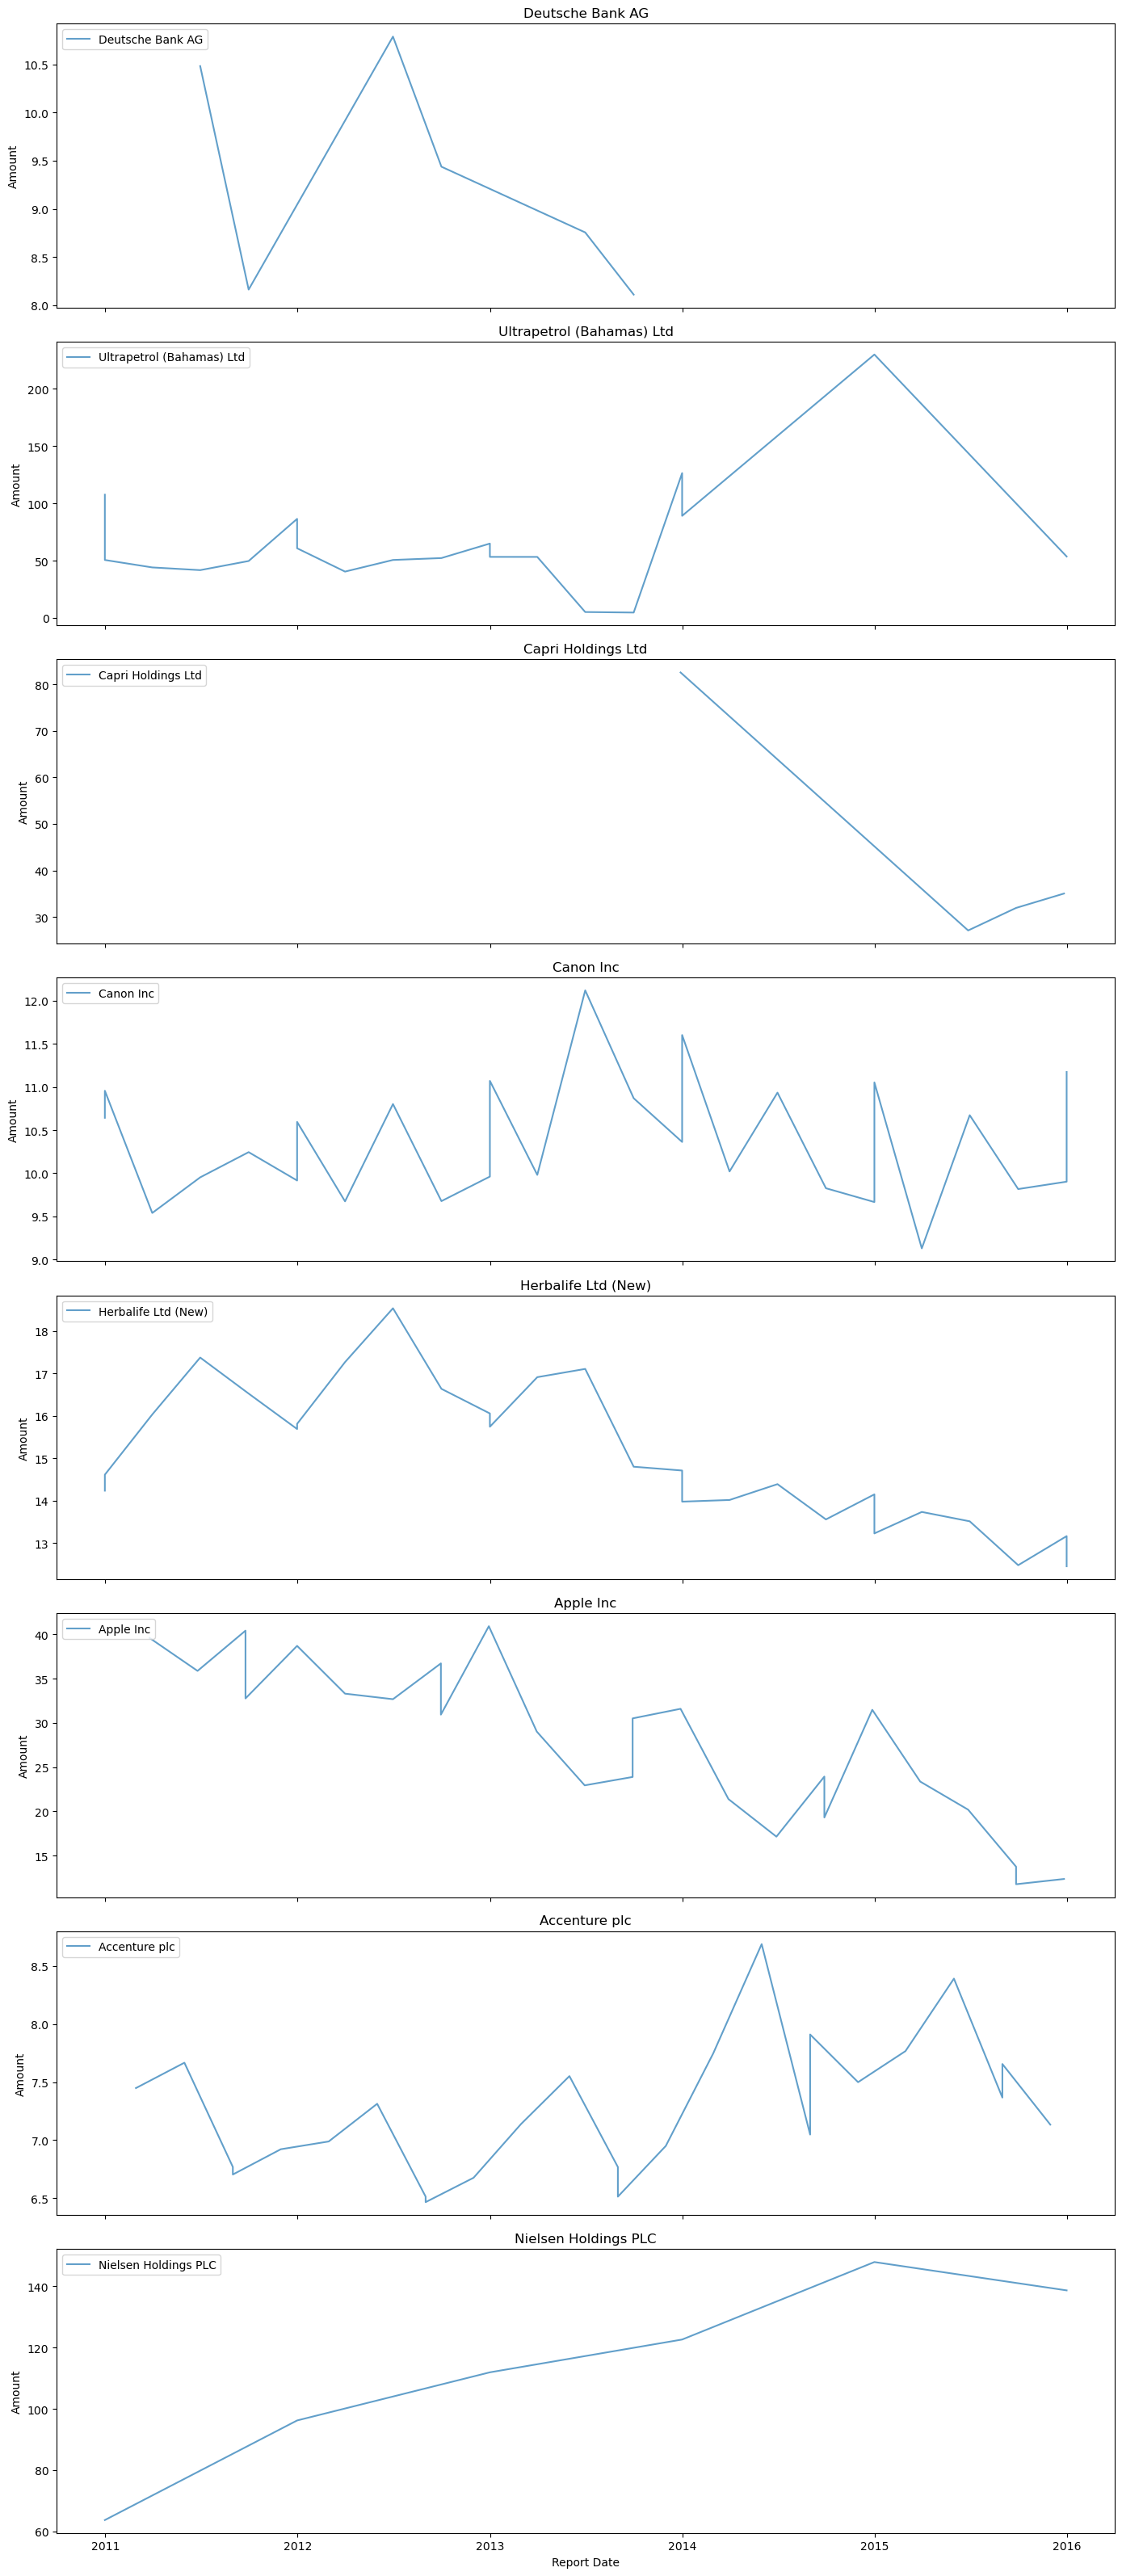

In [23]:
# Faceted approach using subplots
companies = relevant_data['company_name'].unique()
n_companies = len(companies)

# Create a subplot for each company
fig, axs = plt.subplots(n_companies, 1, figsize=(14, 4 * n_companies), sharex=True)

for ax, company in zip(axs, companies):
    company_data = relevant_data[relevant_data['company_name'] == company]
    company_data = company_data.sort_values('report_date')
    
    ax.plot(company_data['report_date'], company_data['amount'], label=company, alpha=0.7)
    ax.set_title(company)
    ax.set_ylabel('Amount')
    ax.legend(loc='upper left')

# Common xlabel
plt.xlabel('Report Date')
plt.tight_layout()
plt.show()

#### Brief Interpretation of Each Plot

**Deutsche Bank AG**

- The line shows a relatively fluctuating pattern. There’s an initial drop, a peak after the second data point, and a downward trend afterward. This could suggest inconsistent performance during the period, with a strong spike and then a gradual decline.

**Ultrapetrol (Bahamas) Ltd**

- The line starts relatively flat but shows a significant upward spike in the middle and then drops sharply. It could indicate that the company had a sudden increase in 'Amount' (revenue or transactions) but couldn't maintain it, followed by a steep decline.

**Capri Holdings Ltd**

- Fairly stable but with some fluctuation, peaking mid-period and then tapering off slightly. This could indicate moderate growth, though nothing too dramatic compared to other companies.

**Canon Inc**

- Shows a fluctuating pattern but remains within a certain range. Peaks and valleys suggest volatility but without extreme shifts. The company might be experiencing consistent but varied performance over time.

**Herbalife Ltd (New)**

- There is a steady climb followed by a gradual drop. The overall range is more moderate compared to some of the other companies. It may indicate that the company experienced growth initially but faced some challenges toward the end of the reporting period.

**Apple Inc**

- The plot shows several peaks and valleys, indicating periodic changes. However, there is no large spike or major dip, which could suggest stable performance with natural fluctuations.

**Accenture plc**

- Similar to Apple, Accenture shows fluctuations without extreme values. There is a clear up-and-down pattern. This indicates typical business cycles, where the company experiences alternating periods of increase and decrease in the 'Amount.'

**Nielsen Holdings PLC**

- The plot displays a clear upward trend over time, followed by a slight decline at the very end. This suggests strong growth in 'Amount' over time with a minor reduction toward the latest period, possibly indicating a consistent and strong performance, though a small drop-off in the end.

Some companies like Nielsen show sustained growth over time, while others exhibit more volatility and sharp rises and falls, possibly due to internal or external factors (like market conditions or seasonal trends).

#### Geographical Region Analysis

**Key Concepts**

- Geographical Region Analysis: Aggregating data by country and calculating key metrics, such as average financial amounts, provides valuable insights into regional performance. This approach allows for the identification of disparities and trends across markets, making it critical for global financial analysis. By understanding each region's economic contribution, businesses can make data-driven decisions, optimizing resource allocation and strategy based on regional strengths and weaknesses.

In [24]:
# Grouping data by country and calculating the average of the 'amount'
country_avg = round(updated_df.groupby('country_name')['amount'].mean(), 2)

In [25]:
# Check distribution of country_avg
country_avg

country_name
Bahamas                     66.52
Cayman Islands              15.06
GBR                         44.17
Germany                      9.29
Ireland                      7.26
Japan                       10.38
United States of America    44.38
Name: amount, dtype: float64

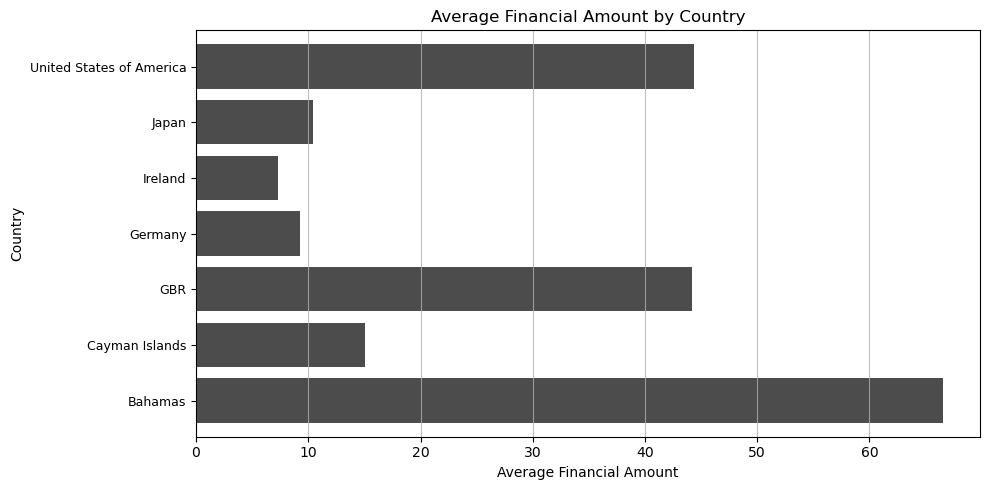

In [26]:
# Plot distribution of country values
plt.figure(figsize=(10,5))

# Set barh style
country_avg.plot(kind='barh', colormap='grey', width=0.8, alpha=0.7)

# Set parameters of plot
plt.title('Average Financial Amount by Country', fontsize=12)
plt.xlabel('Average Financial Amount', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.grid(axis='x', linestyle='-', alpha=0.8)
plt.tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()

**Key observations**

- Bahamas has the highest average financial amount, followed closely by the United States of America.
- GBR (likely referring to the United Kingdom) is also relatively high but lower than the Bahamas and USA.
- Cayman Islands and Japan are in the mid-range.
- Germany and Ireland have the lowest averages, significantly below the top performers.

The result suggests that financial activities or metrics (such as revenues or transactions) are concentrated more heavily in certain regions, with notable disparity between countries.

#### Conclusion

This project provided valuable insights into the financial performance of various companies by analyzing accrued expenses turnover using data retrieved from the Nasdaq Data Link API. By using Python for data extraction, cleaning, and visualization, we were able to highlight key differences in financial performance across different geographical regions and industries. The analysis revealed significant variation in accrued expenses turnover across companies, with some maintaining strong liquidity and operational efficiency, while others struggled with higher turnover ratios.

The visualization of these metrics helped identify patterns of financial health, revealing that companies based in regions like the `Bahamas` and the `United States` tend to have higher average financial amounts compared to others like `Germany` and `Ireland`. These findings emphasize the importance of geographic and industry-specific factors when evaluating a company’s financial health.


**Further Steps**

While this project effectively achieves its primary goal of analyzing 'accrued expenses turnover' across different companies and regions, there are several advanced techniques that could further enrich the analysis but would exceed the intended scope of this work. 

- For instance, incorporating additional financial metrics such as `cash flow ratios` or `debt-to-equity ratios` could provide a more comprehensive understanding of each company’s financial health. 

- Moreover, `advanced time-series analysis` could be employed to capture trends and seasonal patterns in financial performance over time, while `predictive modeling techniques`, such as `regression` or `ARIMA`, could offer insights into future financial trends.